In [1]:
# Reproducibility
import numpy as np
import random
rng = np.random.default_rng(seed=511)
random.seed(511)

# Timing and plotting
import time
import matplotlib.pyplot as plt

# Utility: timing helper
def time_function(fn, *args, repeat=5, **kwargs):
    """Return the best of `repeat` wall-clock timings for fn(*args, **kwargs)."""
    best = float('inf')
    result = None
    for _ in range(repeat):
        start = time.perf_counter()
        out = fn(*args, **kwargs)
        elapsed = time.perf_counter() - start
        if elapsed < best:
            best = elapsed
            result = out
    return best, result

print("Environment ready.")

Environment ready.


Part A — Sorting Showdown
Goal: Empirically compare sorting algorithms and relate runtime to big‑O.

You will:

Generate integer arrays of increasing size.
Sort using:
Python built‑in sorted() (Time to sort ~ O(n log n) average/worst on random data)
Your own insertion sort (O(n²))
One additional algorithm of your choice (e.g., numpy.sort); must add
Measure wall‑clock runtimes as n grows.
Plot runtime vs n and discuss alignment with theory.

In [2]:
# TODO: Implement insertion sort (in-place or return a new list)
def insertion_sort(arr):
    a = list(arr)
    
    
    
    return a

# Sanity check
sample = [5, 2, 4, 6, 1, 3]
assert insertion_sort(sample) == sorted(sample)
print("Insertion sort sanity check passed.")


AssertionError: 

In [3]:
def insertion_sort(arr):
    a = list(arr)  # make a copy so original list is unchanged
    
    for i in range(1, len(a)):
        key = a[i]            # current element
        j = i - 1
        # shift elements of a[0..i-1] that are greater than key to one position ahead
        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key        # insert the key at the correct position
    
    return a

# Sanity check
sample = [5, 2, 4, 6, 1, 3]
assert insertion_sort(sample) == sorted(sample)
print("Insertion sort sanity check passed.")

Insertion sort sanity check passed.


In [4]:
# Experiment sizes (adjust if runtime too long or too short); you can also add more data points
sizes = [5_000, 10_000, 20_000]
repeat = 3

# Cap insertion sort at manageable n
ins_cap = 20_000

In [8]:
results = {
    'n': [],
    'sorted_builtin': [],
    'insertion_sort': [],
    'numpy_sort': [],
    'mergesort':[],
    'quicksort':[]
}

for n in sizes:
    data = rng.integers(low=0, high=10_000_000, size=n, dtype=np.int64)

    t_sorted, _ = time_function(sorted, data, repeat=repeat)
    t_numpy, _ = time_function(np.sort, data, repeat=repeat)
    t_merge, _ = time_function(lambda x: np.sort(x, kind="mergesort"), data, repeat=repeat)
    t_quick, _ = time_function(lambda x: np.sort(x, kind="quicksort"), data, repeat=repeat)

    if n <= ins_cap:
        t_insert, _ = time_function(insertion_sort, data, repeat=repeat)
    else:
        t_insert = np.nan

    results['n'].append(n)
    results['sorted_builtin'].append(t_sorted)
    results['numpy_sort'].append(t_numpy)
    results['mergesort'].append(t_merge)
    results['quicksort'].append(t_quick)
    results['insertion_sort'].append(t_insert)

import pandas as pd
dfA = pd.DataFrame(results)
dfA

,n,sorted_builtin,insertion_sort,numpy_sort,mergesort,quicksort
0,5000,0.003370,1.970573,0.000490,0.000635,0.000496
1,10000,0.005554,9.586609,0.001058,0.001049,0.000775
2,20000,0.014089,39.769413,0.002236,0.002528,0.001986


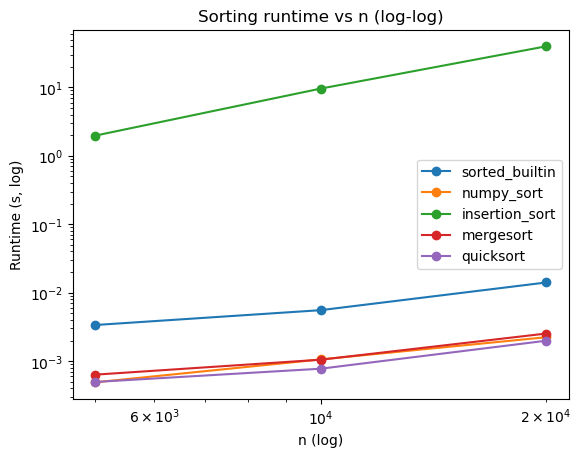

In [10]:
#TODO; plot linear plot from results using the log log template to help.  Need two plots for full credit

plt.figure()
for key in ['sorted_builtin', 'numpy_sort', 'insertion_sort', 'mergesort', 'quicksort']:
    plt.plot(dfA['n'], dfA[key], marker='o', label=key)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (log)')
plt.ylabel('Runtime (s, log)')
plt.title('Sorting runtime vs n (log-log)')
plt.legend()
plt.show()

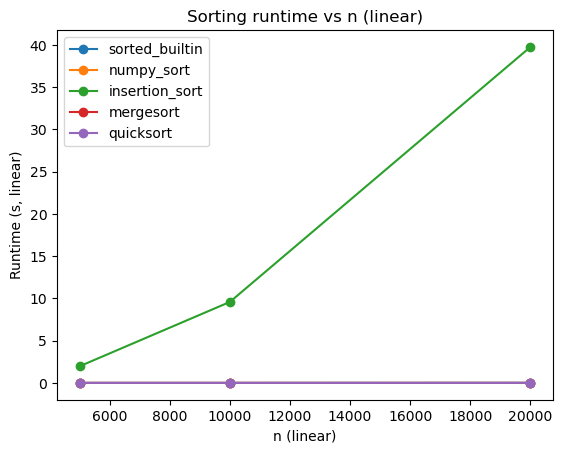

In [11]:
plt.figure()
for key in ['sorted_builtin', 'numpy_sort', 'insertion_sort', 'mergesort', 'quicksort']:
    plt.plot(dfA['n'], dfA[key], marker='o', label=key)

plt.xlabel('n (linear)')
plt.ylabel('Runtime (s, linear)')
plt.title('Sorting runtime vs n (linear)')
plt.legend()
plt.show()

Part B — Data Structures in Action: Membership Testing
Goal: Compare membership query performance for list (≈ O(n)), set (≈ O(1) average), and dict (≈ O(1) average).

You will:

Build collections of increasing size of unique IDs/strings.
Generate random queries that are both present and absent.
Measure membership test times (x in structure) for each structure type.
Plot how query time scales with n.

In [6]:
sizes_B = [10_000, 100_000, 500_000]
queries_per_size = 1_000

def gen_ids(n):
    ids = [f"id_{i:07d}" for i in range(n)]
    rng.shuffle(ids)
    return ids

def membership_timing(ids, structure_type='list'):
    if structure_type == 'list':
        coll = list(ids)
        def contains(x): return x in coll
    elif structure_type == 'set':
        coll = set(ids)
        def contains(x): return x in coll
    elif structure_type == 'dict':
        coll = {x: True for x in ids}
        def contains(x): return x in coll
    
    present = rng.choice(ids, size=queries_per_size//2, replace=False)
    absent = [f"nope_{i:07d}" for i in range(queries_per_size - len(present))]
    queries = np.concatenate([present, absent])
    rng.shuffle(queries)
    
    start = time.perf_counter()
    for q in queries:
        _ = contains(q)
    elapsed = time.perf_counter() - start
    return elapsed

records = {'n': [], 'structure': [], 'time_s': []}

for n in sizes_B:
    ids = gen_ids(n)
    for stype in ['list', 'set', 'dict']:
        t = membership_timing(ids, structure_type=stype)
        records['n'].append(n)
        records['structure'].append(stype)
        records['time_s'].append(t)

dfB = pd.DataFrame(records)
dfB

,n,structure,time_s
0,10000,list,0.210712
1,10000,set,0.000915
2,10000,dict,0.000990
3,100000,list,4.888302
4,100000,set,0.001149
5,100000,dict,0.001943
6,500000,list,27.092363
7,500000,set,0.001223
8,500000,dict,0.000936


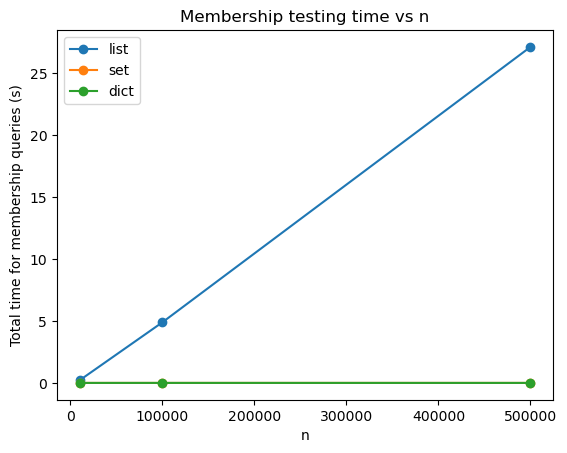

In [7]:
plt.figure()
for stype in ['list', 'set', 'dict']:
    sub = dfB[dfB['structure'] == stype]
    plt.plot(sub['n'], sub['time_s'], marker='o', label=stype)
plt.xlabel('n')
plt.ylabel('Total time for membership queries (s)')
plt.title('Membership testing time vs n')
plt.legend()
plt.show()

In [8]:
Part C — Reflection
In 1–2 pages, discuss:

How well did your empirical results align with expected big‑O?
What practical advice would you give a teammate choosing data structures and sorting methods?
Were there any surprises in your experiments? Explain.
How did you ensure reproducibility?

SyntaxError: invalid character '—' (U+2014) (2252497294.py, line 1)